Nesse exercicio começamos imaginando que fomos contradas para fazer um levantamento do faturamento das lojas nos USA e precisamos apontar qual loja seria melhor para Expandir o seu tamanho.

Vou precisar analisar as vendas semanais de cada loja, calcular algumas informações importantes e indicar no final qual loja deva ser investida.

#A Questão de Negócio:
- Qual a minha meta?

Apontar qual loja seria melhor para expandir seu tamanho.
- Como posso chegar?

Através da analise de dados utilizando as bibliotecas do python.


# O Entendimento do Negócio:
- Quais dados eu tenho disponível?

Temos os dados que apresentam as vendas semanais de 05/20/10 até 01/11/12 em 45 lojas. 

E também algumas métricas econômicas e meteorológicas por semana.
- Eles são relevantes para o problema?

Sim, pois contém informações sobre as vendas em grandes feriados e a quantidade de vendas que é extremamente importante para esse tipo de analise.
- Eles me trazem uma solução direta?

Não, eles trazem informações gerais que precisam ser trabalhadas para apresentar uma solução.
- Qual o meu setor ou range de negócio?

O setor é o de varejo.

#A Coleta de Dados:
- Os dados que eu tenho fazem sentido?

Sim, mas não são diretos eles precisaram de uma limpeza.
- Estão no formato que eu gostaria?

Alguns atributos não, como atributo de data que precisou ser modificado para o formato padrão e alguns atributos estavam com o tipo da variavel incorreto.
- O que mais eu consigo obter de informação destes dados?

Sim, consiguiria.

#A Limpeza de Dados:
- Remoção de dados outliers e valores ausentes.

Sim, foi necessário fazer a remoção de de outliers e remover dados repetidos

#A Exploração de Dados:
- Visualização dos dados.

Sim, foi necessário utilizar seaborn, boxplot.

- Quais as minhas métricas essenciais.

As metricas utilizadas para essa análise foi utilizar a quantidade de vendas por loja comparando com a taxa de desemprego, temperatura e preço do combustivel. Para entender qual é o melhor custo beneficio que eu indicaria.

- Baseado nos dados, qual imóvel ou tipo de imóveis eu deveria comprar.
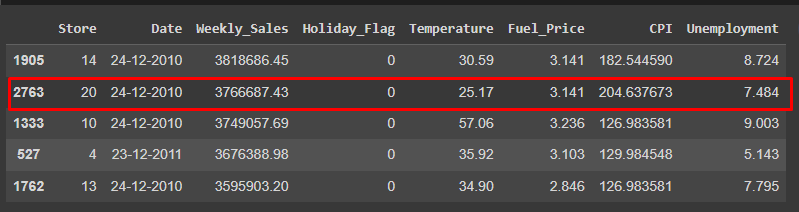

A partir dos dados analisados, eu indicaria a loja número 20 pois a mesma possui uma das maiores vendas em todos os anos analisados, e apesar de ter uma temperatura mais baixa possui uma taxa de desemprego menor e o preço do combustivel é mais alto o que estranhamente causa um maior numero de vendas. E em nossas analises em epocasmais quentes com o combustivel mais alto há mais chancer de haver mais vendas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Dicas de Insights

- Qual o preço médio de venda semanal por loja?
- Qual o atributo que tem maior correlação (positiva ou negativa) com o número de vendas? (E que faça sentido)
- Da loja com maior venda acumulada (soma de vendas de todo o período), quantas
semanas do ano ele ultrapassou a média do período?
seja vendido mais de uma vez naquele período.
- Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao
longo do tempo. Ressalte de alguma forma, o período de feriados mencionados
acima.
- Pensando na expansão de uma das lojas, que loja você escolheria e o por que?

In [3]:
df = pd.read_csv("/content/Walmart.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [13]:
# As 5 casas que eu não indicaria para comprar.

df.sort_values('Weekly_Sales',ascending=True).head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4619,33,03-12-2010,209986.25,0,52.82,3.041,126.731333,9.265
4614,33,29-10-2010,213538.32,0,71.34,3.130,126.436419,9.265
4675,33,30-12-2011,215359.21,1,51.60,3.428,130.071032,8.010
4623,33,31-12-2010,219804.85,1,52.91,3.148,127.087677,9.265
4671,33,02-12-2011,220060.35,0,59.12,3.701,129.845967,8.010


In [14]:
#As 5 casas que eu indicaria.

df.sort_values('Weekly_Sales',ascending=False).head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,24-12-2010,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,24-12-2010,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,24-12-2010,3595903.20,0,34.90,2.846,126.983581,7.795


In [15]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [16]:
print(df.info())
print("-------"*30)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

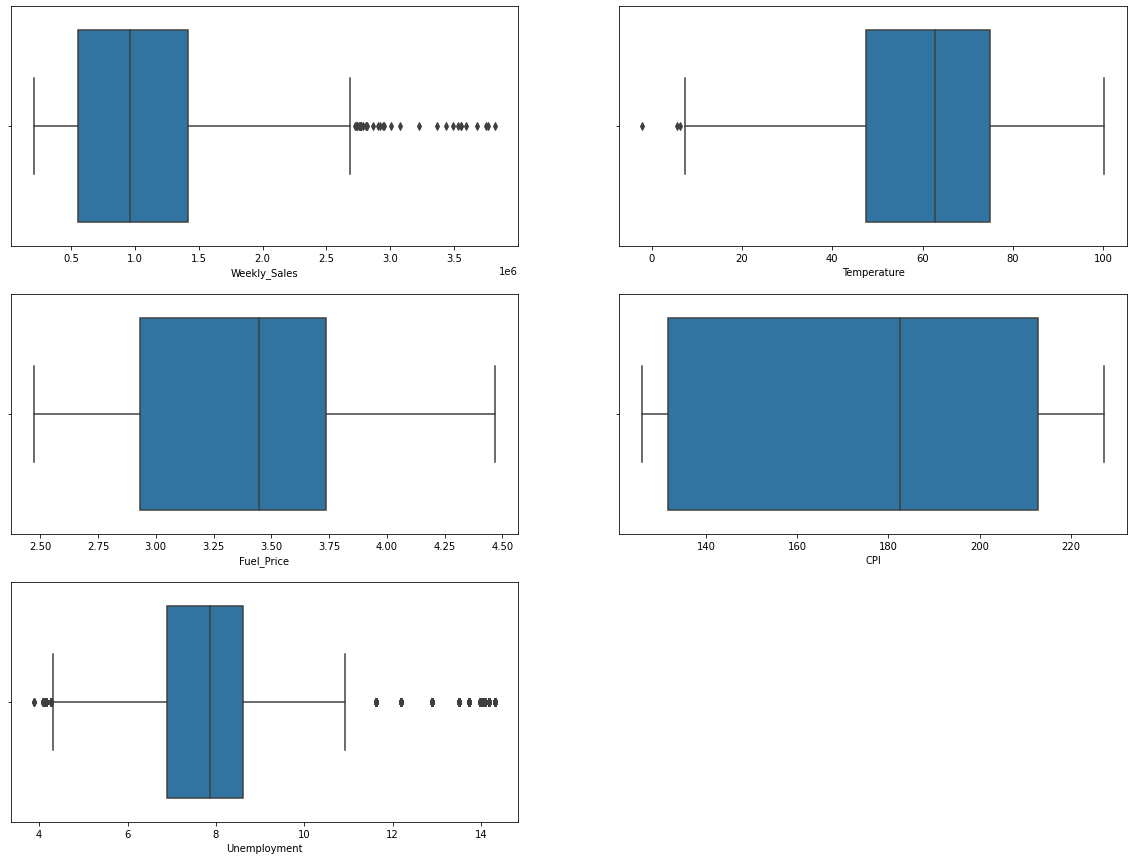

In [17]:
#checando os outliers
pno = 1
plt.figure(figsize = (20,15))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
     if pno<=5:
        plt.subplot(3,2,pno);
        pno+=1
        sns.boxplot(df[i]);
        plt.xlabel(i);

In [18]:
#Tratando esses outliers
def treat_outliers():
    l = ["Weekly_Sales","Temperature","Unemployment"]
    for i in l:
        x = np.quantile(df[i],[0,0.25,0.50,0.75])
        iqr = x[3]-x[1]
        upper_whisker = x[3]+1.5*iqr
        lower_whisker = x[1]-1.5*iqr
        df[i] = np.where(df[i]>upper_whisker,upper_whisker,(np.where(df[i]<lower_whisker,lower_whisker,df[i])))
treat_outliers()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

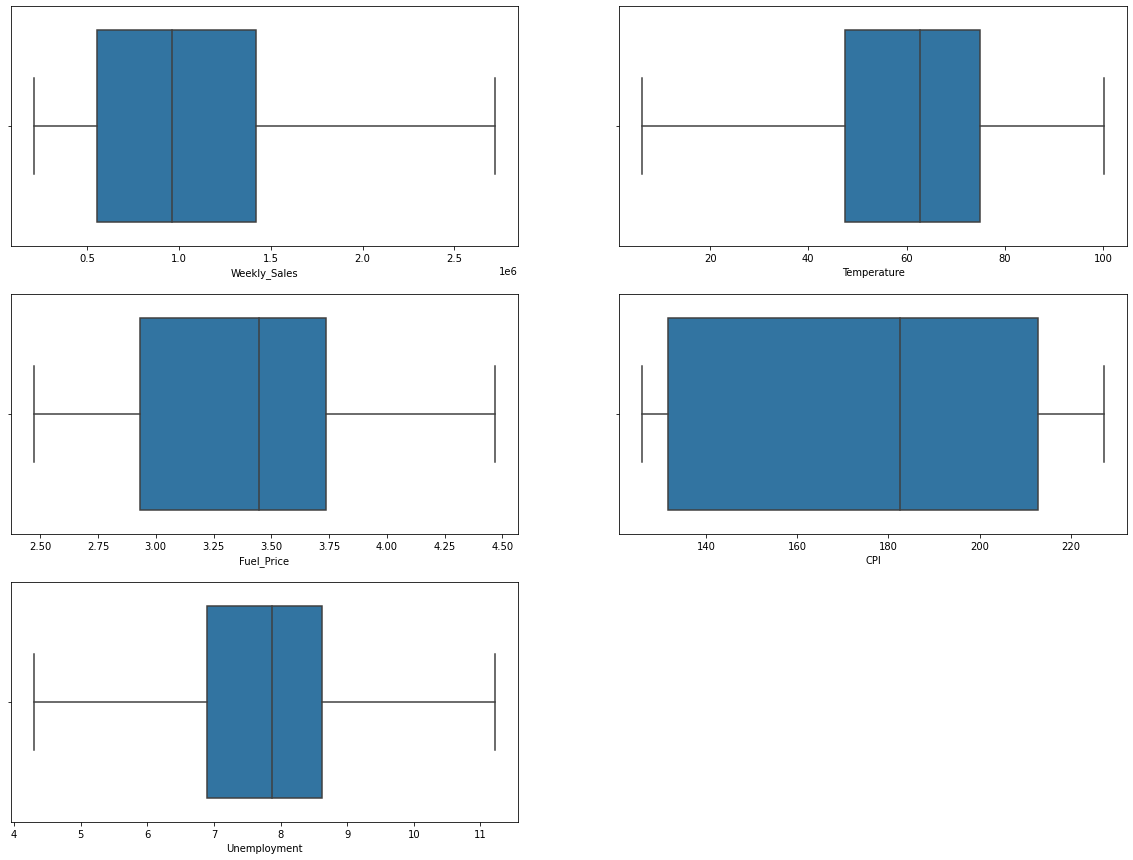

In [19]:
#removendo os outliers
pno = 1
plt.figure(figsize = (20,15))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
     if pno<=5:
        plt.subplot(3,2,pno);
        pno+=1
        sns.boxplot(df[i]);
        plt.xlabel(i);

In [20]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.336559,-4.386841e-16,-0.022749,0.060023,-0.209492,0.255964
Weekly_Sales,-3.365589e-01,1.000000,3.670284e-02,-0.060808,0.010998,-0.072627,-0.108662
Holiday_Flag,-4.386841e-16,0.036703,1.000000e+00,-0.155149,-0.078347,-0.002162,0.011204
Temperature,-2.274937e-02,-0.060808,-1.551494e-01,1.000000,0.144962,0.176960,0.088315
Fuel_Price,6.002295e-02,0.010998,-7.834652e-02,0.144962,1.000000,-0.170642,-0.053428
CPI,-2.094919e-01,-0.072627,-2.162091e-03,0.176960,-0.170642,1.000000,-0.278542
Unemployment,2.559643e-01,-0.108662,1.120376e-02,0.088315,-0.053428,-0.278542,1.000000


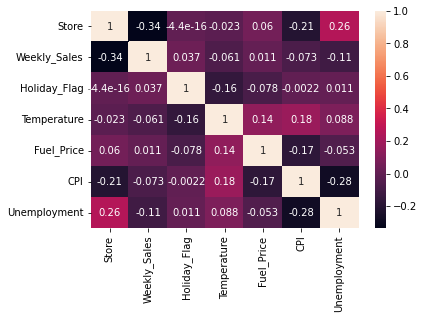

In [21]:
sns.heatmap(df.corr(), annot = True)

In [22]:
fig = px.histogram(df, x='Temperature', y ='Weekly_Sales', color='Holiday_Flag')#,color = "red")#, marginal='box')
fig.show()
# Correlação entre a temperatura e as vendas

In [23]:
fig = px.histogram(df, x='Unemployment', y ='Weekly_Sales')

fig.show()
# Correlação entre desemprego e vendas

In [26]:
fig = px.histogram(df, x='Temperature', y ='Weekly_Sales', marginal='box', title = 'Como a temperatura afeta as Vendas', template='simple_white')
fig.show()

In [27]:
fig = px.histogram(df, x='Unemployment', y ='Weekly_Sales', marginal='box', title = 'Como a taxa de desemprego afeta as Vendas', template='simple_white')
fig.show()

In [28]:
fig = px.histogram(df, x='Fuel_Price', y ='Weekly_Sales', marginal='box', title = 'Como o preço dos combustiveis afeta as Vendas', template='simple_white')
fig.show()

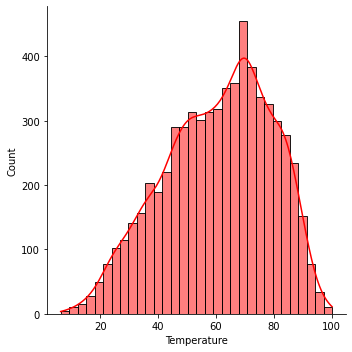

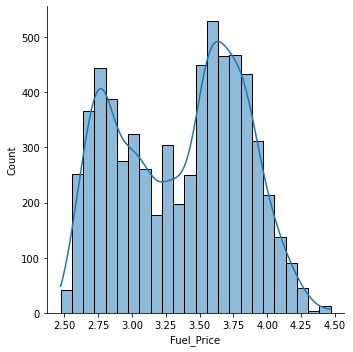

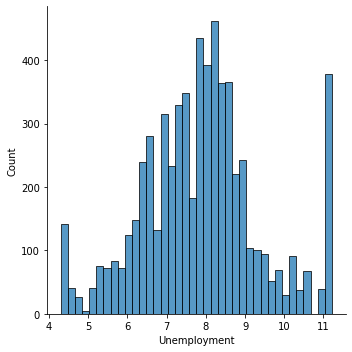

In [25]:
sns.displot(df['Temperature'],kde=True,color = 'r')#, ax=axes[1])
sns.displot(df['Fuel_Price'],kde=True)
sns.displot(df['Unemployment'],kde=False)

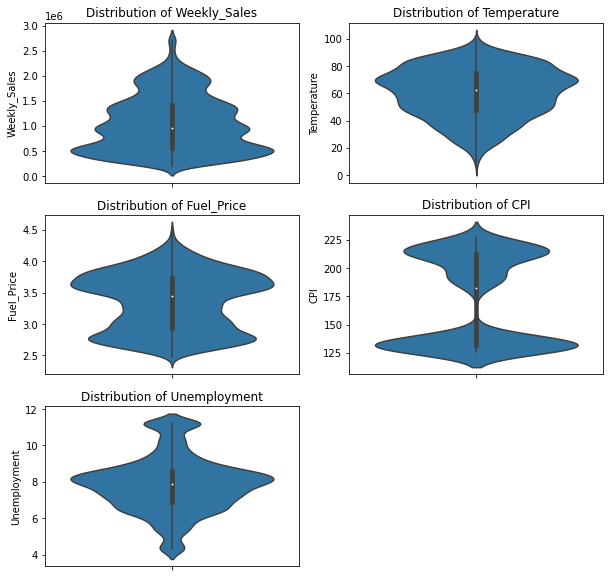

In [33]:
plt.figure(figsize=(10,10)) 
dist_cols=['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
for i in range(0,len(dist_cols)):
    plt.subplot(3,2,i+1)
    sns.violinplot(data=df, y=dist_cols[i])
    plt.title(f'Distribution of {dist_cols[i]}')

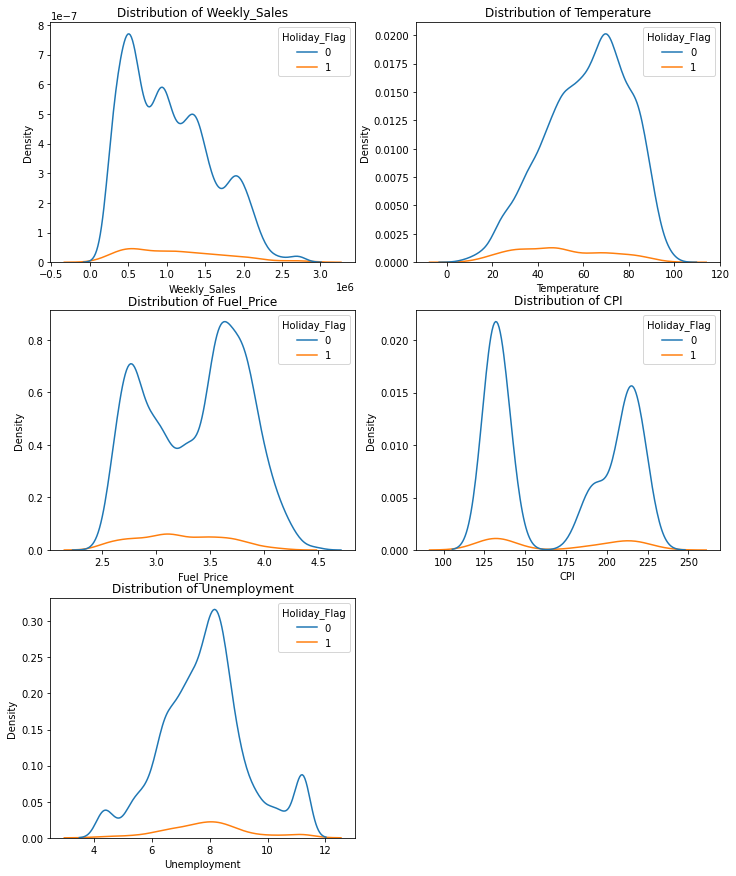

In [34]:
plt.figure(figsize=(12,15)) 
dist_cols=['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
for i in range(0,len(dist_cols)):
    figure= plt.subplot(3,2,i+1)
    sns.kdeplot(data=df, x=dist_cols[i], hue='Holiday_Flag')
    plt.title(f'Distribution of {dist_cols[i]}')

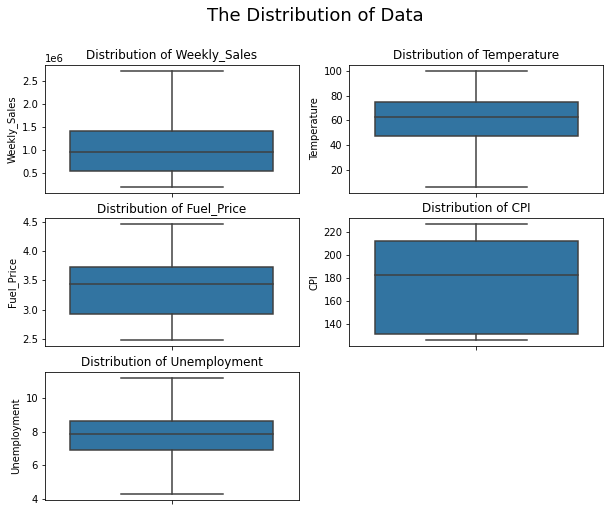

In [35]:
#Removendo Outliers
plt.figure(figsize=(10,8)) 
plt.suptitle('The Distribution of Data', fontsize=18)
dist_cols=['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
for i in range(0,len(dist_cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df, y=dist_cols[i])
    plt.title(f'Distribution of {dist_cols[i]}')

In [36]:
def remove_outlier_IQR(df, cols):
    for col in cols:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        upper_limit= Q3+1.5*IQR
        lower_limit= Q1-1.5*IQR
        df = df[df[col] < upper_limit]
        df = df[df[col] > lower_limit]
    return df

In [37]:
df=remove_outlier_IQR(df, dist_cols)

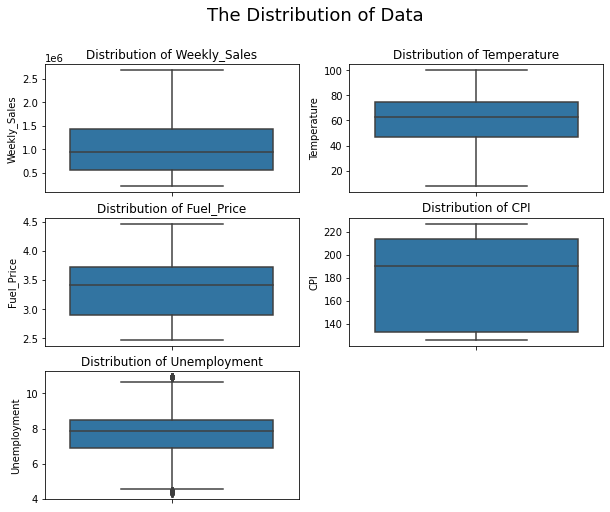

In [38]:
#Checando os dados após remover os outliers
plt.figure(figsize=(10,8)) 
plt.suptitle('The Distribution of Data', fontsize=18)
for i in range(0,len(dist_cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df, y=dist_cols[i])
    plt.title(f'Distribution of {dist_cols[i]}')

In [39]:
mean_CPI= df.CPI.mean()
mean_fuel_price=df.Fuel_Price.mean()

In [40]:
# Convertendo CPI e as coluna Fuel price para (Low and High)
df['CPI']= np.where(df['CPI'] <= mean_CPI,'Low','High')
df['Fuel_Price']= np.where(df['Fuel_Price'] <= mean_fuel_price,'Low','High')
# Convertendo a coluna da Temperature para (Warm, Cool, Cold, Hot) 
df['Temperature']= np.where((df['Temperature'] <= 65) & (df['Temperature'] > 45) ,'Warm',
                            np.where((df['Temperature'] <= 45) & (df['Temperature'] > 25) ,'Cool'
                            ,
                            np.where((df['Temperature'] <= 25) & (df['Temperature'] >= 10) ,'Cold'
                            ,
                            'Hot')))

In [41]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,Cool,Low,High,8.106
1,1,12-02-2010,1641957.44,1,Cool,Low,High,8.106
2,1,19-02-2010,1611968.17,0,Cool,Low,High,8.106
3,1,26-02-2010,1409727.59,0,Warm,Low,High,8.106
4,1,05-03-2010,1554806.68,0,Warm,Low,High,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,Warm,High,High,8.684
6431,45,05-10-2012,733455.07,0,Warm,High,High,8.667
6432,45,12-10-2012,734464.36,0,Warm,High,High,8.667
6433,45,19-10-2012,718125.53,0,Warm,High,High,8.667


In [42]:
print(df.CPI.value_counts())
print(df.Fuel_Price.value_counts())
print(df.Temperature.value_counts())

High    3274
Low     2643
Name: CPI, dtype: int64
High    3197
Low     2720
Name: Fuel_Price, dtype: int64
Hot     2702
Warm    1924
Cool    1084
Cold     207
Name: Temperature, dtype: int64


In [43]:
# Extraindo os dados de day, month, year da coluna Date:
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,1643690.90,0,Cool,Low,High,8.106,6,5,2010
1,1,1641957.44,1,Cool,Low,High,8.106,3,12,2010
2,1,1611968.17,0,Cool,Low,High,8.106,4,2,2010
3,1,1409727.59,0,Warm,Low,High,8.106,4,2,2010
4,1,1554806.68,0,Warm,Low,High,8.106,0,5,2010


In [44]:
# Convertendo valores numericos para valores categoricos nas colunas day, month, year, holiday flag.
# Date column
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df['day'] = df['day'].map(days)
months={
1:'January',
 2:'February',
 3:'March',
 4:'April',
 5:'May',
 6:'June',
7:'July',
 8:'August',
 9:'September',
10:'October',
11:'November',
 12:'December'}
df['month']= df['month'].map(months)
# Holiday_week column
holiday_week= {1:'Holiday week', 0:'Non-holiday week'}
df['Holiday_Flag']= df['Holiday_Flag'].map(holiday_week)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,1643690.90,Non-holiday week,Cool,Low,High,8.106,Saturday,May,2010
1,1,1641957.44,Holiday week,Cool,Low,High,8.106,Wednesday,December,2010
2,1,1611968.17,Non-holiday week,Cool,Low,High,8.106,Thursday,February,2010
3,1,1409727.59,Non-holiday week,Warm,Low,High,8.106,Thursday,February,2010
4,1,1554806.68,Non-holiday week,Warm,Low,High,8.106,Sunday,May,2010


In [45]:
# Total de vendas anuais
df.groupby('year')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()

,Weekly_Sales
year,
2011,2.260434e+09
2010,2.097829e+09
2012,1.791352e+09


In [46]:
# Total das vendas mensais
df.groupby('month')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()

,Weekly_Sales
month,
April,5.973073e+08
May,5.639639e+08
October,5.580741e+08
July,5.510156e+08
September,5.491708e+08
June,5.278322e+08
August,5.236554e+08
March,5.100323e+08
December,4.882449e+08


In [47]:
# Total das vendas diarias
df.groupby('day')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()

,Weekly_Sales
day,
Thursday,4.062584e+09
Sunday,4.909649e+08
Wednesday,4.402775e+08
Monday,4.026278e+08
Saturday,4.006949e+08
Friday,2.655530e+08
Tuesday,8.691354e+07


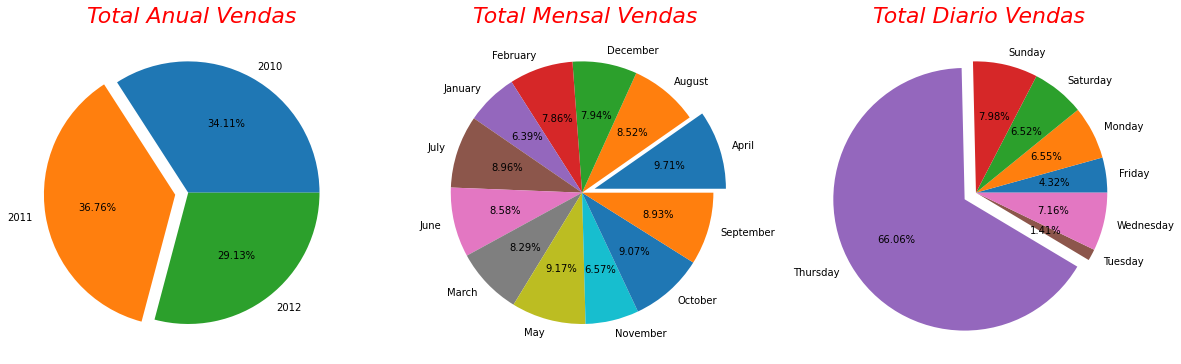

In [51]:
plt.figure(figsize=(20,15)) 
cols=['year','month', 'day']
titles=['Anual','Mensal', 'Diario']
for i in range(0,len(cols)):
    figure= plt.subplot(1,3,i+1)
    vall = df.groupby(cols[i])['Weekly_Sales'].sum().values
    max_vall=max(vall)
    explode_value = tuple([0 if vall[j] != max_vall else 0.1 for j in range(len(vall))])
    plt.pie(df.groupby(cols[i])['Weekly_Sales'].sum().values, labels=df.groupby(cols[i])['Weekly_Sales'].sum().index, autopct='%.2f%%', explode=explode_value)
    plt.title(f' Total {titles[i]} Vendas', color='red', fontsize= 22, fontstyle='italic')

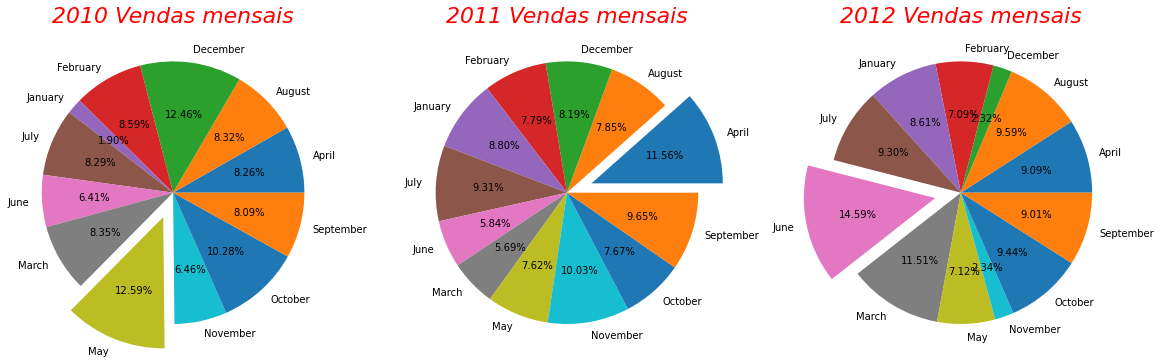

In [52]:
# Maiores vendas anuais
plt.figure(figsize=(20,15)) 
df1= df[df['year']==2010]
df2= df[df['year']==2011]
df3= df[df['year']==2012]
ddf=[df1, df2, df3]
years=['2010', '2011', '2012']
for i in range(0,len(ddf)):   
    figure= plt.subplot(1,3,i+1)
    val = ddf[i].groupby('month')['Weekly_Sales'].sum().values
    max_val=max(val)
    explode_value = tuple([0 if val[j] != max_val else 0.2 for j in range(len(val))])
    plt.pie(val, labels=ddf[i].groupby('month')['Weekly_Sales'].sum().index, autopct='%.2f%%', explode=explode_value)
    plt.title(f'{years[i]} Vendas mensais', color='red', fontsize= 22, fontstyle='italic')

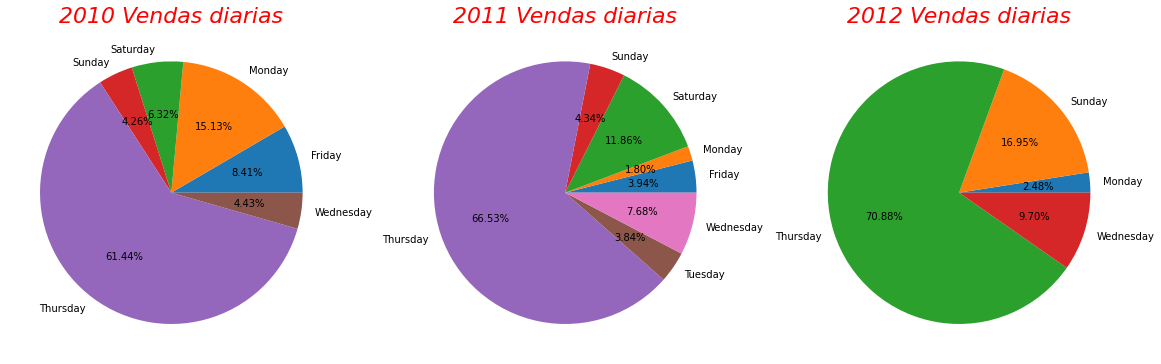

In [53]:
# Maiores vendas diarias separadas anualmente
plt.figure(figsize=(20,15)) 
df1= df[df['year']==2010]
df2= df[df['year']==2011]
df3= df[df['year']==2012]
ddf=[df1, df2, df3]
years=['2010', '2011', '2012']
for i in range(0,len(ddf)):
    figure= plt.subplot(1,3,i+1)
    plt.pie(ddf[i].groupby('day')['Weekly_Sales'].sum().values, labels=ddf[i].groupby('day')['Weekly_Sales'].sum().index, autopct='%.2f%%')
    plt.title(f'{years[i]} Vendas diarias', color='red', fontsize= 22, fontstyle='italic')

In [54]:
sales=df.groupby(['year','month'])['Weekly_Sales'].sum().to_frame()
df_sales=pd.DataFrame(sales)
df_sales=df_sales.reset_index()
df_sales

,year,month,Weekly_Sales
0,2010,April,1.732263e+08
1,2010,August,1.744531e+08
2,2010,December,2.614204e+08
3,2010,February,1.802125e+08
4,2010,January,3.982560e+07
5,2010,July,1.739798e+08
6,2010,June,1.344962e+08
7,2010,March,1.752329e+08
8,2010,May,2.640776e+08
9,2010,November,1.355024e+08


In [55]:
# O Top 3 lojas de 2010 e o seu total de vendas
df1.groupby(['Store'])['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).head(3).reset_index()

,Store,Weekly_Sales
0,14,95958984.81
1,2,91841856.51
2,20,89583444.00


In [56]:
# O Top 3 lojas de 2011 e o seu total de vendas
df2.groupby(['Store'])['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).head(3).reset_index()

,Store,Weekly_Sales
0,14,1.027272e+08
1,4,1.016398e+08
2,20,1.006126e+08


In [57]:
# O Top 3 lojas de 2012 e o seu total de vendas
df3.groupby(['Store'])['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).head(3).reset_index()

,Store,Weekly_Sales
0,20,89827709.38
1,13,86707455.02
2,2,81496695.37


In [58]:
# Vendas totais vs Preço do combustivel
df.groupby('Fuel_Price')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
Fuel_Price,
High,3.332622e+09
Low,2.816994e+09


In [59]:
# Total de vendas vs CPI
df.groupby('CPI')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
CPI,
High,3.286055e+09
Low,2.863560e+09


#Observação: O Wallmart ganha mais quando o preço do combustivel e o CPI está mais alto

In [60]:
# Total de vendas vs Temperatura
df.groupby('Temperature')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
Temperature,
Hot,2.759108e+09
Warm,2.023666e+09
Cool,1.176644e+09
Cold,1.901981e+08


# Observações: As pessoas gastão mais dinheiro quando está mais quente e a temperatura está mais alta. E também notamos que normalmente, as pessoas preferem comprar suas coisas no Walmart antes da semana dos feriados